# The 3-Point Era: Are More Threes Really the Key to Winning?

This project explores the NBA’s dramatic shift toward 3-point shooting since the 3-point line was introduced in 1980. While it’s obvious that 3-point attempts (3PA) have skyrocketed. Especially following the rise of specifically Stephen Curry, we want to go beyond the surface.

The goal is to visualize this trend and then ask the real question: **Does taking more threes actually lead to more wins?** You don’t need a data analyst to tell you teams are shooting more. What we want to know is whether it’s working, and do you need an all time great shooter like Steph to make it work.

Some hypotheses we’ll explore later:
- Is there a correlation between 3-point volume and winning?
- Does a team need multiple high-efficiency shooters to make it work?
- Has the definition of “elite” 3-point shooting changed over time?

> *All league-wide data used in this analysis was sourced from [Basketball-Reference.com](https://www.basketball-reference.com/).*

### Visualizing the Rise in 3-Point Attempts (1980–Present)

This chart shows the league-wide average number of 3-point attempts (3PA) per game from 1980—the year the 3-point line was introduced—through the present day. The sharp rise in 3PA over the past two decades reflects a major shift in offensive strategy.

Notably, the chart highlights the 2009–10 season when Stephen Curry entered the NBA. His impact on the modern game is often credited with accelerating the 3-point revolution. 

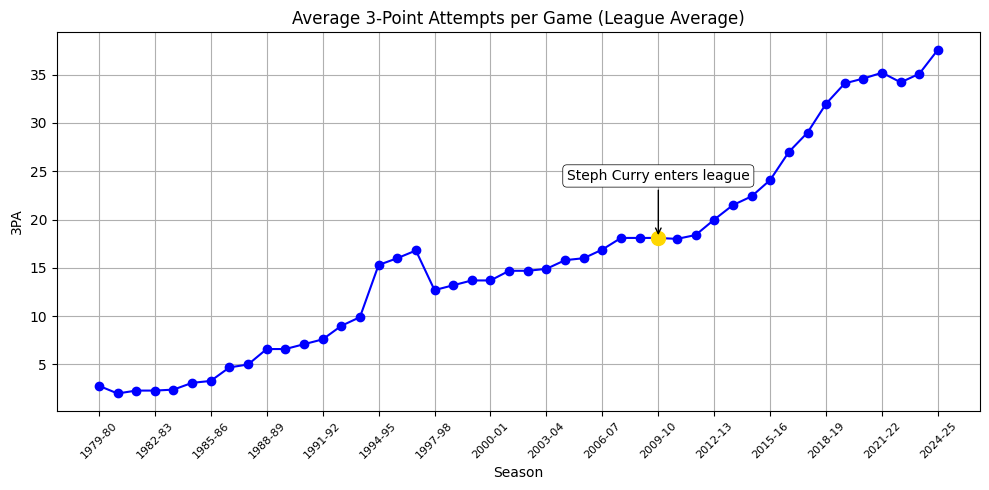

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the raw CSV and skip the first two rows
df = pd.read_csv('data/raw/league_per_game_raw.csv', skiprows=2)

# Keep only rows with valid season formats (e.g., "1980-81")
df = df[df['Season'].astype(str).str.contains('-')]

# Convert 3PA to numeric
df['3PA'] = pd.to_numeric(df['3PA'], errors='coerce')

# Sort seasons in chronological order
df = df[::-1].reset_index(drop=True)

# Plot the trend
plt.figure(figsize=(10, 5))

# Line plot of all 3PA values
plt.plot(df['Season'], df['3PA'], marker='o', color='blue')

# Highlight 2009-10 in gold
highlight_season = '2009-10'
highlight_value = df.loc[df['Season'] == highlight_season, '3PA'].values[0]
highlight_index = df.index[df['Season'] == highlight_season][0]

plt.plot(highlight_index, highlight_value, marker='o', color='gold', markersize=10)

# Add annotation
plt.annotate('Steph Curry Enters League',
             xy=(highlight_index, highlight_value),
             xytext=(highlight_index, highlight_value + 6),  # raised higher
             ha='center',
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=0.5))  # adds a readable background


plt.xticks(ticks=range(0, len(df), 3), labels=df['Season'][::3], rotation=45, fontsize=8)
plt.title('Average 3-Point Attempts per Game (League Average)')
plt.xlabel('Season')
plt.ylabel('3PA')
plt.grid(True)
plt.tight_layout()
plt.show()



### 3PA vs FGA per 100 Possessions

This chart compares the number of 3-point attempts (3PA) and total field goal attempts (FGA) per 100 possessions across seasons. By looking at 3PA in the context of total shot volume, we can see how much of a team's offensive strategy is dedicated to shooting from beyond the arc.

While total FGA per 100 possessions has remained relatively stable over time, the number of 3-point attempts has steadily increased. This indicates that teams aren't necessarily getting more shots up per possession—they're just choosing to take more of those shots from three-point range. (which, pretty obvious)

As with the previous chart, the 2009–10 season is highlighted to mark the beginning of Stephen Curry's NBA career—a key moment often associated with the surge in 3-point shooting.



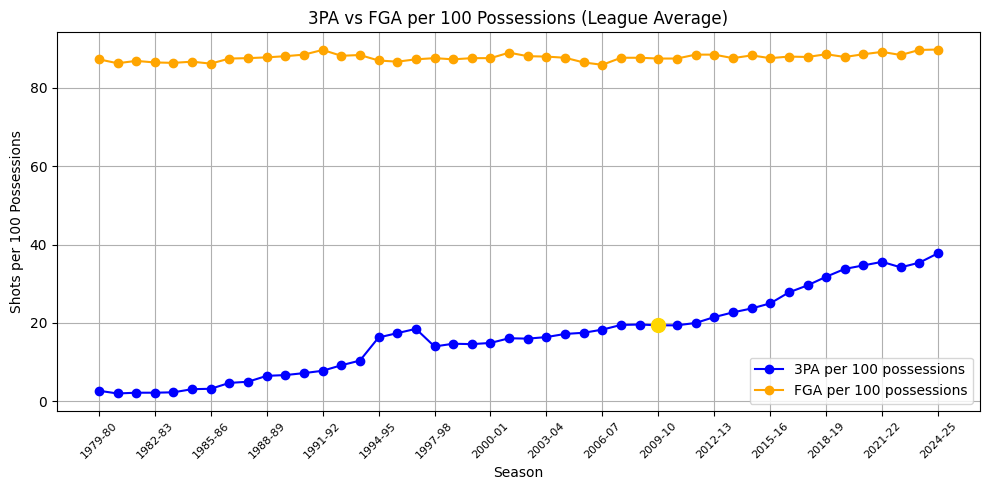

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean the per 100 possessions data
df_poss = pd.read_csv('data/raw/league_per_poss_raw.csv', skiprows=2)

# Keep only valid seasons
df_poss = df_poss[df_poss['Season'].astype(str).str.contains('-')]

# Convert columns to numeric
df_poss['3PA'] = pd.to_numeric(df_poss['3PA'], errors='coerce')
df_poss['FGA'] = pd.to_numeric(df_poss['FGA'], errors='coerce')

# Sort by season chronologically
df_poss = df_poss[::-1].reset_index(drop=True)

# Highlight Steph Curry's rookie season
highlight_season = '2009-10'
highlight_index = df_poss.index[df_poss['Season'] == highlight_season][0]
highlight_3pa = df_poss.loc[df_poss['Season'] == highlight_season, '3PA'].values[0]

# ------------------ Plot 1: 3PA and FGA per 100 possessions ------------------
plt.figure(figsize=(10, 5))
plt.plot(df_poss['Season'], df_poss['3PA'], marker='o', color='blue', label='3PA per 100 possessions')
plt.plot(df_poss['Season'], df_poss['FGA'], marker='o', color='orange', label='FGA per 100 possessions')
plt.plot(highlight_index, highlight_3pa, marker='o', color='gold', markersize=10)


plt.xticks(ticks=range(0, len(df_poss), 3), labels=df_poss['Season'][::3], rotation=45, fontsize=8)
plt.title('3PA vs FGA per 100 Possessions (League Average)')
plt.xlabel('Season')
plt.ylabel('Shots per 100 Possessions')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
